# Introduction to Optical Character Recognition (OCR)

https://github.com/ezponda/intro_deep_learning/blob/main/class/CNN/OCR_with_OpenCV_and_Tesseract.ipynb

Optical Character Recognition, or OCR, is a technology used to convert different types of documents, such as scanned paper documents, PDF files, or images captured by a digital camera, into editable and searchable data. OCR is widely used for digitizing printed texts so that they can be electronically edited, searched, stored more compactly, displayed online, and used in machine processes such as machine translation, text-to-speech, and data mining.

## Challenges in OCR
OCR is not always straightforward due to various challenges, such as:

1. **Font Variability:** Different font styles and sizes can affect the OCR accuracy.
2. **Background Noise:** Images with noisy backgrounds can make text detection difficult.
3. **Layout and Formatting:** Complex layouts with columns, boxes, and other formatting elements can complicate text extraction.
4. **Image Quality:** Low resolution or blurry images can lead to poor OCR results.

## Tesseract OCR

Tesseract is an open-source OCR engine. It can read and recognize text in various languages and is widely regarded as one of the most accurate free OCR engines available.

### Key Functions of Tesseract

1. **Text Detection:** Identifying and extracting textual content from images.
2. **Language Support:** Recognizing multiple languages.
3. **Customization:** Ability to train Tesseract for new fonts or languages.

## Using Tesseract with OpenCV

OpenCV (Open Source Computer Vision Library) is an open-source computer vision and machine learning software library. It can be used in conjunction with Tesseract to preprocess images for better OCR results.


### Installing Required Libraries


#### Install Tesseract OCR

First, you need to check if Tesseract OCR is installed on your system.

- **For Windows:**
  - Download the installer from [Tesseract at UB Mannheim](https://github.com/UB-Mannheim/tesseract/wiki).
  - Run the installer and remember the path where you install Tesseract (e.g., `C:\Program Files\Tesseract-OCR`).
  - You will need this path to set the environment variable.

- **For macOS:**
  - You can install Tesseract using Homebrew with the command: `brew install tesseract`.

- **For Linux:**
  - Use the package manager to install Tesseract. For example, on Ubuntu, you can use `sudo apt-get install tesseract-ocr`.

#### Set the PATH Environment Variable

If Tesseract is installed but not found, you might need to add its installation directory to your system's PATH.

- **For Windows:**
  - Go to the Control Panel -> System and Security -> System -> Advanced system settings -> Environment Variables.
  - Under System Variables, find and select the variable named PATH, then click Edit.
  - Add the path to the Tesseract installation directory (e.g., `C:\Program Files\Tesseract-OCR`).
  - Click OK to save the changes.

- **For macOS and Linux:**
  - The Tesseract path is usually added to the system PATH automatically. If not, you can add it by modifying the `.bashrc` or `.zshrc` file in your home directory with the command like `export PATH=$PATH:/usr/local/bin/tesseract` (adjust the path as necessary).

#### Specify the Path in Your Python Code

Alternatively, you can specify the path to the Tesseract executable directly in your Python code:

```python
import pytesseract

# Specify the path to tesseract.exe
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Update this path

# Rest of your code
```

Replace `C:\Program Files\Tesseract-OCR\tesseract.exe` with the actual path where Tesseract OCR is installed on your system.


```python
!pip install opencv-python
!pip install pytesseract
```

### Basic OCR Example


In [ ]:
!pip install -q opencv-python
!pip install -q pytesseract
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (14.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

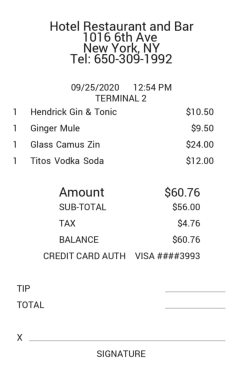

In [ ]:
import cv2
import urllib
import pytesseract
import matplotlib.pyplot as plt

url = "https://github.com/ezponda/intro_deep_learning/blob/main/images/restaurant-bar-receipt-sample.jpg?raw=true"
urllib.request.urlretrieve(url, "restaurant-bar-receipt-sample.jpg")

# Path to the image
image_path = "restaurant-bar-receipt-sample.jpg"
# Load an image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

## `pytesseract.image_to_string`
The function takes an image as input and returns the text contained within that image as a string. It's important to preprocess the image to improve OCR accuracy.

In [ ]:
text = pytesseract.image_to_string(image)
print(text)

Hotel Restaurant and Bar
6th Ave
New York, NY
Tel: 650-309-1992

09/25/2020 12:54PM

TERMINAL 2
Hendrick Gin & Tonic $10.50
Ginger Mule $9.50
Glass Camus Zin $24.00
Titos Vodka Soda $12.00
Amount $60.76
SUB-TOTAL $56.00
TAX $4.76
BALANCE $60.76

CREDIT CARD AUTH VISA ####3993

TIP
TOTAL

 

SIGNATURE



## Tesseract OCR Options

Tesseract provides several command-line options that can be used to optimize its OCR capabilities. These include specifying the tessdata path, language, page segmentation modes (PSM), and OCR Engine modes (OEM), among others. Let's explore some of these options:

#### Tessdata Directory
- `--tessdata-dir PATH`: Sets the location of the tessdata directory containing language files and other data.

#### Language Options
- `-l LANG[+LANG]`: Sets the language(s) for OCR. Tesseract supports multiple languages, and you can specify more than one language separated by a plus sign.

#### Config Variables
- `-c VAR=VALUE`: Sets various configuration variables. You can use multiple `-c` arguments.

#### Page Segmentation Modes (PSM)
Tesseract offers different page segmentation modes suitable for various image layouts:
1. `0`: Orientation and script detection (OSD) only.
2. `1`: Automatic page segmentation with OSD.
3. `3`: Fully automatic page segmentation, but no OSD. (Default)
4. `4`: Assume a single column of text of variable sizes.
5. `6`: Assume a single uniform block of text.
6. `7`: Treat the image as a single text line.
7. `8`: Treat the image as a single word.
8. `10`: Treat the image as a single character.
9. `11`: Sparse text. Find as much text as possible in no particular order.

#### OCR Engine Modes (OEM)
Tesseract has different OCR engine modes:
1. `0`: Legacy engine only.
2. `1`: Neural nets LSTM engine only.
3. `2`: Legacy + LSTM engines.
4. `3`: Default, based on what is available.


In [ ]:
#!tesseract --help-psm

### Question 1: Use the correct PSM mode for extracting the tex in the next image

```python
config = '--psm <PSM mode>'

text = pytesseract.image_to_string(image, config=config)
```

`PSM mode` can be `0, 1, ..., 11`

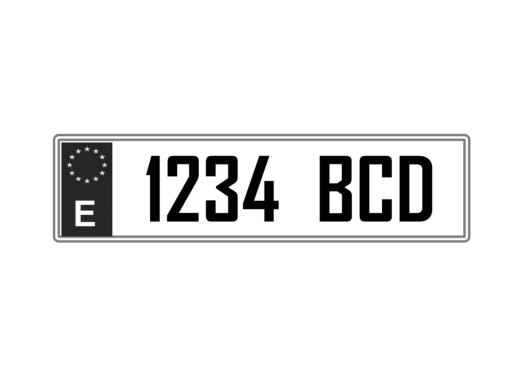

In [ ]:
url = 'https://github.com/ezponda/intro_deep_learning/blob/main/images/car_plate.png?raw=true'
urllib.request.urlretrieve(url, "car_plate.png")


image_1 = cv2.imread("car_plate.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(image_1, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
text = pytesseract.image_to_string(image_1)
print(text)

A 1234 BCD



### Question 1: Change the `config` parameter

In [ ]:
config = '--psm 7 -l eng'

text = pytesseract.image_to_string(image_1, config=config)
print(text)

A 1234 BCD




### `pytesseract.image_to_boxes` for Text Localization

This function returns the recognized characters and their box boundaries, which is useful for understanding how Tesseract is interpreting the text in an image.


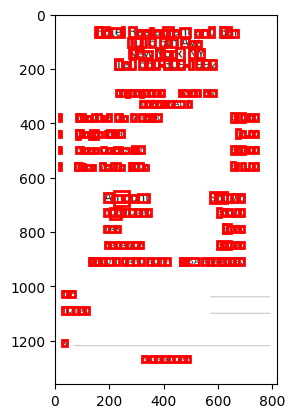

In [ ]:
from matplotlib import patches


# Use pytesseract to detect characters and their boxes
config = '--psm 6 -l eng'
boxes = pytesseract.image_to_boxes(image, config=config)

# Plotting the image and boxes
fig, ax = plt.subplots(1)
ax.imshow(image, cmap='gray')

# Adding the boxes to the image
for b in boxes.splitlines():
    b = b.split(' ')
    ax.add_patch(patches.Rectangle((int(b[1]), image.shape[0] - int(b[2])), int(b[3]) - int(b[1]), int(b[2]) - int(b[4]), fill=False, edgecolor='red', lw=2))

#plt.axis('off')
plt.show()

In [ ]:
print(boxes)

H 149 1281 174 1315 0
o 154 1281 199 1317 0
t 180 1281 202 1306 0
e 205 1281 243 1312 0
l 248 1281 253 1317 0
R 272 1281 297 1315 0
e 301 1281 322 1306 0
s 326 1281 346 1306 0
t 349 1281 362 1312 0
a 366 1281 387 1306 0
u 393 1281 413 1306 0
r 397 1281 433 1315 0
a 420 1281 433 1306 0
n 435 1281 456 1306 0
t 461 1281 499 1312 0
a 514 1281 535 1306 0
n 541 1281 562 1306 0
d 566 1281 587 1317 0
B 606 1281 629 1315 0
a 613 1281 649 1315 0
r 634 1281 674 1306 0
1 270 1241 282 1275 0
0 295 1241 316 1275 0
1 322 1241 334 1275 0
6 347 1241 369 1275 0
6 385 1241 407 1275 0
t 409 1241 422 1272 0
h 427 1241 448 1277 0
A 463 1241 492 1275 0
v 494 1241 516 1266 0
e 518 1241 539 1266 0
N 272 1201 297 1235 0
e 280 1201 323 1235 0
w 303 1201 359 1226 0
Y 373 1195 389 1237 0
o 373 1201 400 1235 0
r 403 1201 425 1226 0
k 431 1201 444 1226 0
, 447 1195 475 1237 0
N 492 1201 517 1235 0
Y 523 1201 550 1235 0
T 222 1161 245 1197 0
e 222 1161 248 1195 0
l 250 1161 271 1186 0
: 277 1161 293 1197 0
6 311 1161

### `pytesseract.image_to_data`

The `pytesseract.image_to_data` function provides a more detailed output compared to image_to_string. It not only extracts text but also gives information about the positioning, confidence scores, and other details for each detected textual element. This function is particularly useful for applications where you need in-depth data about the text layout in an image.

In [ ]:
import pandas as pd
config = '--psm 6 -l eng'
data = pytesseract.image_to_data(image,config=config, output_type=pytesseract.Output.DICT)
print(data.keys())
df = pd.DataFrame(data)
df.head(10)

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,819,1361,-1,
1,2,1,1,0,0,0,13,44,734,1236,-1,
2,3,1,1,1,0,0,13,44,734,1236,-1,
3,4,1,1,1,1,0,149,44,525,36,-1,
4,5,1,1,1,1,1,149,44,104,36,96,Hotel
5,5,1,1,1,1,2,272,46,227,34,96,Restaurant
6,5,1,1,1,1,3,514,44,73,36,96,and
7,5,1,1,1,1,4,606,46,68,34,95,Bar
8,4,1,1,1,2,0,270,84,269,36,-1,
9,5,1,1,1,2,1,270,86,99,34,96,1016


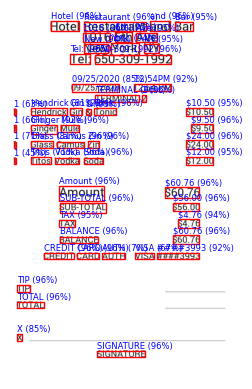

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

plt.imshow(image, cmap='gray')
plt.axis('off')

# Iterate over each word
for i in range(len(df)):
    # Only consider entries with a confidence level
    if df['conf'][i] > 0:
        # Extract coordinates and dimensions of the bounding box
        (x, y, w, h) = (df['left'][i], df['top'][i], df['width'][i], df['height'][i])
        plt.gca().add_patch(Rectangle((x, y), w, h, fill=False, edgecolor='red', lw=1))
        text = f"{df['text'][i]} ({df['conf'][i]}%)"
        plt.gca().text(x, y - 10, text, color='blue', fontsize=6)

plt.show()

### Question 2: Create a script to extract the amount from the bill.

Hint: You can use the `line_num` field or `word_num` field from the output DataFrame.

In [ ]:
amount = 0.0
amount_line = -1

for i, row in df.iterrows():
    line_num = row['line_num']
    word_num = row['word_num']
    text = row['text']
    # print(line_num, word_num, text)

    if text.lower() == "amount":
      amount_line = line_num
      print("Amount line identified:", amount_line)
    elif line_num == amount_line and text[0] == "$" and word_num >= 1:
      amount = float(text[1:].strip())
      print("Amount found, breaking loop...\n\n")
      break

if amount_line == -1:
  print("Amount was not found in the OCR")
else:
  print(f"Total amount: {amount:.2f}$")

Amount line identified: 11
Amount found, breaking loop...


Total amount: 60.76$


# Image Preprocessing for Enhancing OCR Quality

Image preprocessing is a crucial step in improving the accuracy of Optical Character Recognition (OCR). Preprocessing techniques can help mitigate issues such as noise, distortion, and variable lighting in images, which can significantly impact the performance of OCR algorithms.

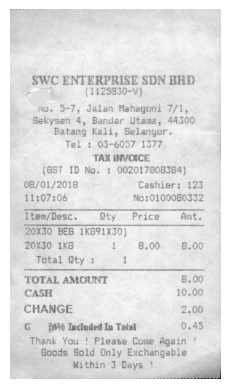

In [ ]:
url = 'https://github.com/ezponda/intro_deep_learning/blob/main/images/bad_quality_receipt.png?raw=true'
urllib.request.urlretrieve(url, "bad_quality_receipt.png")

image_bad = cv2.imread('bad_quality_receipt.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(image_bad, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
config = '--psm 6 -l eng'

text = pytesseract.image_to_string(image_bad, config=config)
print(text)

SWC ENTERPRISE SDN BHD
ay (1125850-V)}
no. 5-7, Jalan Mahagoni 7/1,
Sekysen 4, Bandar Utama, 44300
Batang Kali, Selangor.
Tel : 03-6057 1377 |
TAX INVOICE
(GST ID No. : 002017808384)
06/01/2018 Cashier: 123
11:07:06 No:0100080332
Item/Desc. Qty Price Amt.
2OX30 BEG 1KG91X30)
20X30 1KG i 8.00 8.00
Total Qty : i
TOTAL AMOUNT 8.00
CASH 10.00
CHANGE 2,00
G 86% Incladed In Totel 0.45
Thank You ! Please Come Again !
Goods Sold Only Exchangable
Within 3 Days | i :



## Histogram Equalization Using CLAHE

Contrast Limited Adaptive Histogram Equalization (CLAHE) is an advanced form of histogram equalization that is used to improve the local contrast of an image. Unlike standard histogram equalization, which applies the same contrast adjustment across the entire image, CLAHE divides the image into smaller blocks and applies histogram equalization to each of these blocks independently. This method can be particularly effective for OCR purposes as it enhances the local contrast and can make the text in an image more readable, especially in cases where the lighting varies across the image.

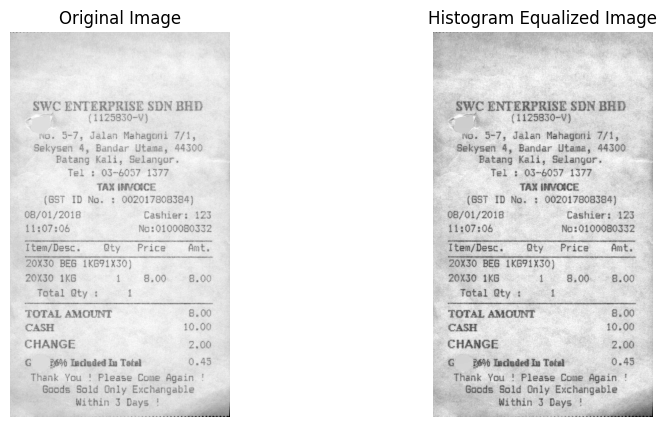

In [ ]:
import cv2
import matplotlib.pyplot as plt

def equalize_histogram(gray_image):
    clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8, 8))
    return clahe.apply(gray_image)


equalized_image = equalize_histogram(image_bad)

# Display both images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_bad, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.show()

In [ ]:
config = '--psm 6 -l eng'

text = pytesseract.image_to_string(equalized_image, config=config)
print(text)

SWC ENTERPRISE SDN BHD
oh (1125850-V}
fo. 5-7, Jalan Mahagoni 7/1, :
. ekysen 4, Bandar Utama, 44300
Batang Kali, Selangor. ;
Tel : 03-6057 1377 ;
TAX INVOICE |
{GSY ID No. : 002017808384}
08/01/2018 Cashier: 123
11:07:06 No: 0100080332
Item/Desc. Qty Price Amt.
2OX30 BEG 1KG91X30}
20X30 1KG i 8.00 8.00
Total Qty : 1
TOTAL AMOUNT 8.00
CASH 10.00
CHANGE 2,004
G 86% Included In Totel 0.45
Thank You ! Please Come Again '
. Goods Sold Gnly Exchangable :
mes Within 3 Days ! : il



In [ ]:
import cv2
import pytesseract
from ipywidgets import interact, IntSlider, FloatSlider
from IPython.display import HTML, display

def apply_clahe(clipLimit, tileGridSize):
    # Ensure the image is in BGR format
    if len(image_bad.shape) == 2 or image_bad.shape[2] == 1:  # Image is already grayscale
        gray_image = image_bad
    else:
        gray_image = cv2.cvtColor(image_bad, cv2.COLOR_BGR2GRAY)

    # Create a CLAHE object
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=(tileGridSize, tileGridSize))

    # Apply CLAHE to the grayscale image
    clahe_image = clahe.apply(gray_image)

    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(clahe_image, cmap='gray')
    plt.title('CLAHE Enhanced Image')
    plt.axis('off')

    plt.show()

    # Perform OCR on the CLAHE-enhanced image
    config = '--psm 6 -l eng'
    text = pytesseract.image_to_string(clahe_image, config=config)
    # Print the OCR results in a "cooler" text box
    #print("\033[1;32;40m OCR Result: \n{}\033[0m".format(text))
    print("OCR Result: \n{}".format(text))


# Interactive widget for CLAHE parameters
interact(apply_clahe,
         clipLimit=FloatSlider(min=0, max=5, step=0.1, value=2, description='Clip Limit'),
         tileGridSize=IntSlider(min=1, max=32, step=1, value=8, description='Tile Grid Size'))


interactive(children=(FloatSlider(value=2.0, description='Clip Limit', max=5.0), IntSlider(value=8, descriptio…

<function __main__.apply_clahe(clipLimit, tileGridSize)>

## Thresholding

Thresholding can be used to create a binary image from a grayscale image. It enhances the contrast between the text and the background, which is often beneficial for OCR.


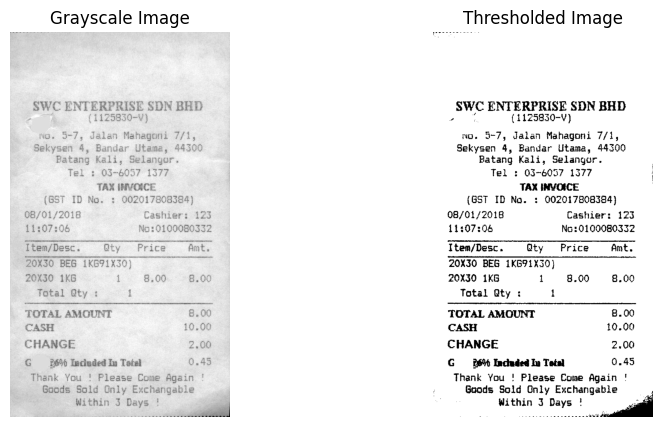

In [ ]:
def apply_thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Apply thresholding
thresh_image = apply_thresholding(image_bad)

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_bad, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresh_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.show()

In [ ]:
config = '--psm 6 -l eng'

text = pytesseract.image_to_string(thresh_image, config=config)
print(text)

SWC ENTERPRISE SDN BHD
- 4 (1125950-V)
ng. +7, Jalan Mahagoni 7/1,
Sekysen 4, Bandar Utama, 44300
Ratang Kali, Selangor. |
Tel : 03-6057 1377 ,
TAX INVOICE
(GST ID No. : 002017808384)
08/01/2018 Cashier: 123
11:07:06 No 20100080332
Item/Desc. Qty Price Amt.
20X30 BEG 1KG91X50}
20X30 1KG 1 8.00 8.00
Total Qty : 1
TOTAL AMOUNT 8.00
CASH 10.00
CHANGE 2.00
G 26% Included In Toisl 0.45
Thank You ! Please Come Again !
: Gaods Sold Only Exchangable
Within 3 Days ! “a :



In [ ]:
from ipywidgets import interact, widgets


def interactive_ocr_preprocessing(clipLimit, tileGridSize, thresh_type, threshold, block_size, C):
    # Ensure the image is in BGR format
    if len(image_bad.shape) == 2 or image_bad.shape[2] == 1:  # Image is already grayscale
        gray_image = image_bad
    else:
        gray_image = cv2.cvtColor(image_bad, cv2.COLOR_BGR2GRAY)

    # Apply CLAHE to the grayscale image, if selected
    if clipLimit > 0 and tileGridSize > 0:
        clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=(tileGridSize, tileGridSize))
        processed_image = clahe.apply(gray_image)
    else:
        processed_image = gray_image

    # Apply thresholding based on the user's choice
    if thresh_type == 'Binary':
        _, processed_image = cv2.threshold(processed_image, threshold, 255, cv2.THRESH_BINARY)
    elif thresh_type == 'Adaptive Mean':
        processed_image = cv2.adaptiveThreshold(processed_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, C)
    elif thresh_type == 'Adaptive Gaussian':
        processed_image = cv2.adaptiveThreshold(processed_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C)

    # Display the processed image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(processed_image, cmap='gray')
    plt.title('Processed Image')
    plt.axis('off')

    plt.show()

    # Perform OCR on the processed image
    config = '--psm 6 -l eng'
    text = pytesseract.image_to_string(processed_image, config=config)
    # Print the OCR results in a styled format
    print("OCR Result: \n{}".format(text))

interact(interactive_ocr_preprocessing,
         clipLimit=widgets.FloatSlider(min=-1, max=5, step=0.1, value=0, description='CLAHE CL', continuous_update=False),
         tileGridSize=widgets.IntSlider(min=0, max=16, step=1, value=0, description='CLAHE Grid-Size', continuous_update=False),
         thresh_type=widgets.Dropdown(options=['None', 'Binary', 'Adaptive Mean', 'Adaptive Gaussian'], value='None', description='Threshold Type'),
         threshold=widgets.IntSlider(min=0, max=255, step=1, value=127, description='Binary Th', continuous_update=False),
         block_size=widgets.IntSlider(min=3, max=21, step=1, value=11, description='Adpt Block Size', continuous_update=False, disabled=False),
         C=widgets.IntSlider(min=0, max=20, step=1, value=2, description='Adpt C Value', continuous_update=False)
        );


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='CLAHE CL', max=5.0, min=-1.…

## Noise Removal

Removing noise from the image can help in reducing the OCR errors, especially when dealing with low-quality scans or photographs.

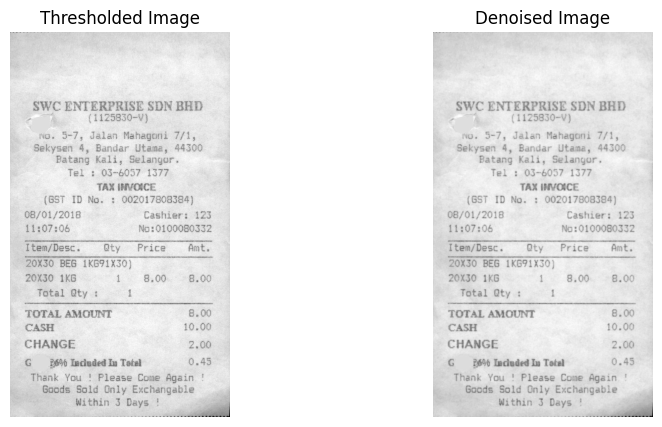

In [ ]:
def remove_noise(image):
    return cv2.medianBlur(image, 3)

# Apply noise removal
denoised_image = remove_noise(image_bad)

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_bad, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

plt.show()

## Morphological Operations

Morphological operations are a set of operations that process images based on shapes. They apply a structuring element to an input image and produce an output image. The primary operations are dilation and erosion, which can be combined to form operations like opening and closing. These operations are particularly useful in the preprocessing stage of OCR to enhance the visibility of text.

### Structuring Element

The structuring element is a matrix that decides the nature of the operation being applied to the image. The shape and size of the structuring element affect the outcome of the morphological operation. Common shapes include rectangles, ellipses, and crosses. In OpenCV, `cv2.getStructuringElement()` is used to create a structuring element.

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# This code creates a 5x5 rectangular structuring element.
print(kernel)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


### Dilation

Dilation adds pixels to the boundaries of objects in an image. It can be used to increase the size of foreground objects.

**Code Example:**

```python
dilated_image = cv2.dilate(src_image, kernel, iterations=1)
```

Here, `src_image` is the source image, `kernel` is the structuring element, and `iterations=1` indicates that the dilation operation should be applied once.

### Erosion

Erosion removes pixels at the boundaries of objects. It is used to diminish the features of an image.

**Code Example:**

```python
eroded_image = cv2.erode(src_image, kernel, iterations=1)
```

### Opening and Closing

- **Opening** is erosion followed by dilation. It is useful in removing noise.
- **Closing** is dilation followed by erosion. It is useful in closing small holes or gaps in the foreground.

**Code Example for Opening:**

```python
opening_image = cv2.morphologyEx(src_image, cv2.MORPH_OPEN, kernel)
```

**Code Example for Closing:**

```python
closing_image = cv2.morphologyEx(src_image, cv2.MORPH_CLOSE, kernel)
```


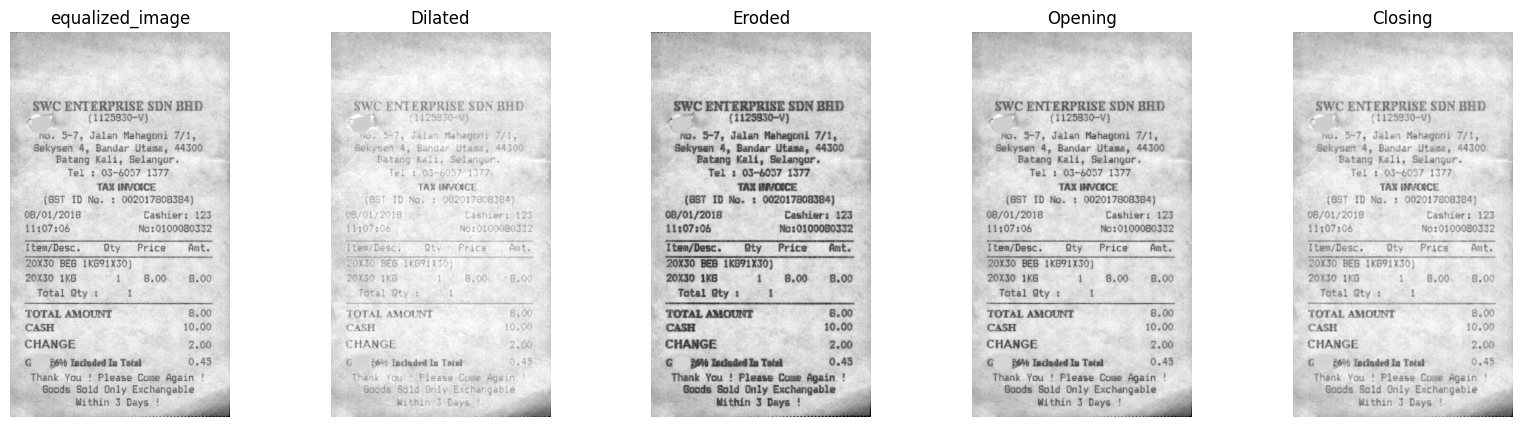

In [ ]:
# Apply dilation
dilated_image = cv2.dilate(equalized_image, kernel, iterations=1)

# Apply erosion
eroded_image = cv2.erode(equalized_image, kernel, iterations=1)

# Apply opening
opening_image = cv2.morphologyEx(equalized_image, cv2.MORPH_OPEN, kernel)

# Apply closing
closing_image = cv2.morphologyEx(equalized_image, cv2.MORPH_CLOSE, kernel)

# Plotting the images
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
axs[0].imshow(equalized_image, cmap='gray')
axs[0].set_title('equalized_image')
axs[1].imshow(dilated_image, cmap='gray')
axs[1].set_title('Dilated')
axs[2].imshow(eroded_image, cmap='gray')
axs[2].set_title('Eroded')
axs[3].imshow(opening_image, cmap='gray')
axs[3].set_title('Opening')
axs[4].imshow(closing_image, cmap='gray')
axs[4].set_title('Closing')

for ax in axs:
    ax.axis('off')
plt.show()

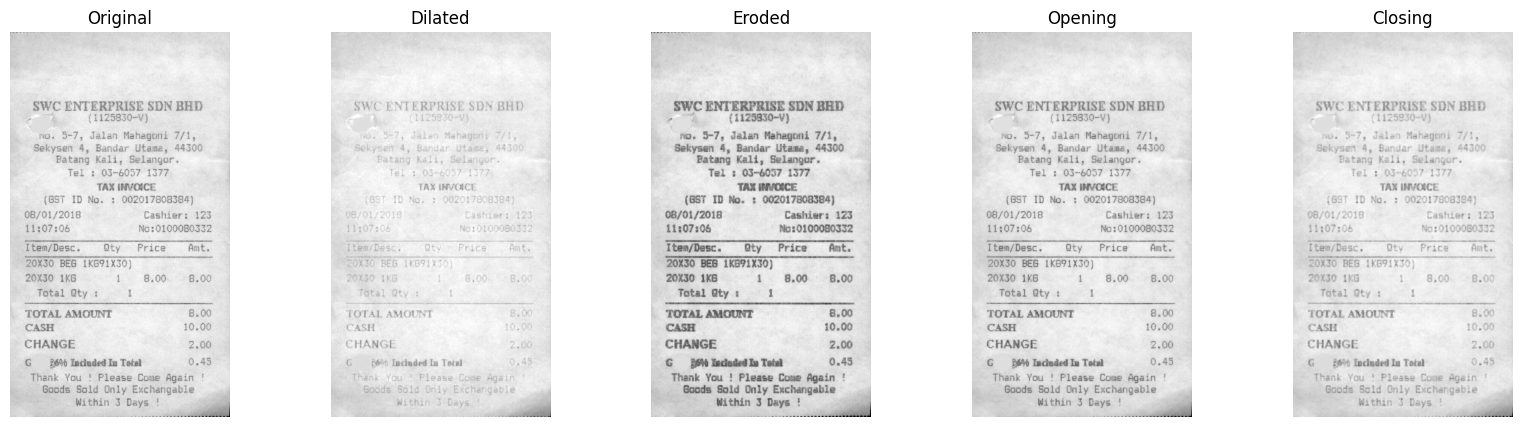

In [ ]:
# Apply dilation
dilated_image = cv2.dilate(image_bad, kernel, iterations=1)

# Apply erosion
eroded_image = cv2.erode(image_bad, kernel, iterations=1)

# Apply opening
opening_image = cv2.morphologyEx(image_bad, cv2.MORPH_OPEN, kernel)

# Apply closing
closing_image = cv2.morphologyEx(image_bad, cv2.MORPH_CLOSE, kernel)

# Plotting the images
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
axs[0].imshow(image_bad, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(dilated_image, cmap='gray')
axs[1].set_title('Dilated')
axs[2].imshow(eroded_image, cmap='gray')
axs[2].set_title('Eroded')
axs[3].imshow(opening_image, cmap='gray')
axs[3].set_title('Opening')
axs[4].imshow(closing_image, cmap='gray')
axs[4].set_title('Closing')

for ax in axs:
    ax.axis('off')
plt.show()

## Question 3: Use image processing techniques for obtain a better OCR result

In [ ]:
def ocr_preprocessing(clipLimit, tileGridSize, thresh_type, threshold, block_size, C):
    # Ensure the image is in BGR format
    if len(image_bad.shape) == 2 or image_bad.shape[2] == 1:  # Image is already grayscale
        gray_image = image_bad
    else:
        gray_image = cv2.cvtColor(image_bad, cv2.COLOR_BGR2GRAY)

    # Apply CLAHE to the grayscale image, if selected
    if clipLimit > 0 and tileGridSize > 0:
        clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=(tileGridSize, tileGridSize))
        processed_image = clahe.apply(gray_image)
    else:
        processed_image = gray_image

    # Apply thresholding based on the user's choice
    if thresh_type == 'Binary':
        _, processed_image = cv2.threshold(processed_image, threshold, 255, cv2.THRESH_BINARY)
    elif thresh_type == 'Adaptive Mean':
        processed_image = cv2.adaptiveThreshold(processed_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, C)
    elif thresh_type == 'Adaptive Gaussian':
        processed_image = cv2.adaptiveThreshold(processed_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C)

    # Display the processed image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(processed_image, cmap='gray')
    plt.title('Processed Image')
    plt.axis('off')

    plt.show()

    return processed_image

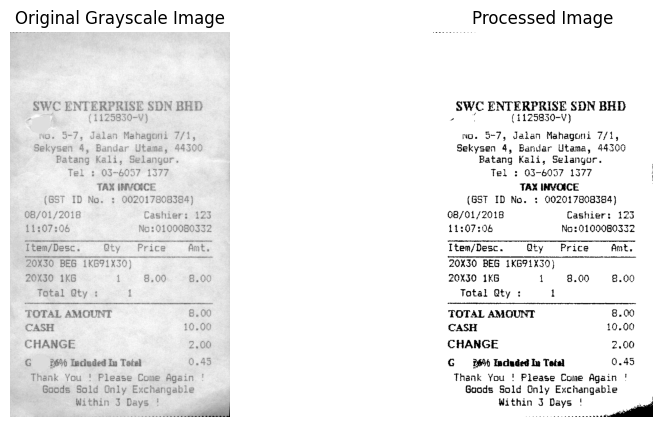

In [ ]:
new_image = ocr_preprocessing(0.90, 10, "Binary", 155, 11, 2)

In [ ]:
config = '--psm 4 -l eng'

text = pytesseract.image_to_string(new_image, config=config)
print(text)

SWC ENTERPRISE SDN BHD
(1125830-V}

no. 8-7, Jalan Mahagoni 7/1,
Sekysen 4, Bandar Utama, 44306
Batang Kali, Selangor

Tel : 93-6057 1377

TAX INVOICE
(GST ID No. + 002017808384)
06/01/2018 Cashier: 123
11:07:06 Ne: 0100080352

Ttem/Desc. Qty Price Ant.
20X30 BEG 1KG91K39)}

 

20X30 1KB 1 8.00 8.00
Total Gty : 1

TOTAL AMOUNT 8.00

CASH 10.00

CHANGE 2.00

G 606 Included In Tatsl 0.45

Thank You ! Please Come Again |
Goods Sold Only Exchangable

Within 3 3 Days ' ost

